In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

### Exercise - 1

<p>The hourly wages in a particular industry are normally distributed with mean 13.20 dollars and standard deviation 2.50 dollars. A company in this industry employs 40 workers, paying them an average of 12.20 dollars per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18) </p>

In [2]:
mu = 13.20
std = 2.50
n = 40
x = 12.20
alpha = 0.01

In [3]:
# Ho : mu = 13.20
# Ha : mu != 13.20
z_statistic = ((x - mu) / (std/n**0.5))
z_statistic

-2.5298221281347035

In [4]:
p_value = stats.norm.cdf(z_statistic)
p_value

0.005706018193000826

In [6]:
if p_value < alpha:
    print('''We reject the null hypothesis.''')
else:
    print('We fail to reject the null hypothesis.')

We reject the null hypothesis.


### Exercise - 2
<p>Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?</p>

In [7]:
soil = pd.read_csv('soil.csv')

In [8]:
soil.head(3)

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337


In [9]:
soil.isnull().sum()

Soil1    5
Soil2    0
dtype: int64

In [10]:
s1=soil.Soil1[soil.Soil1.notnull()]
s2=soil.Soil2

In [13]:
# Ho : mu1 = mu2
# Ha : mu1 != mu2
alpha = 0.01
test = stats.ttest_ind(s1,s2)
test

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.593228732352821e-06)

In [14]:
if test.pvalue < alpha:
    print('''We reject the null hypothesis. ''')
else:
    print('We fail to reject the null hypothesis.')

We reject the null hypothesis. 


### Exercise - 3
<p>The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.</p>
<p>1.Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
    
2.Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.</p>

In [15]:
df = pd.read_csv('2015_PISA_Test.csv')

In [16]:
df

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375
...,...,...,...,...,...,...
65,TUN,AF,48.519836,366.8180,361.0555,386.4034
66,TUR,EU,53.744979,420.4540,428.3351,425.4895
67,URY,SA,64.600000,417.9919,436.5721,435.3630
68,USA,NaN,74.554202,469.6285,496.9351,496.2424


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country Code            70 non-null     object 
 1   Continent_Code          65 non-null     object 
 2   internet_users_per_100  70 non-null     float64
 3   Math                    70 non-null     float64
 4   Reading                 70 non-null     float64
 5   Science                 70 non-null     float64
dtypes: float64(4), object(2)
memory usage: 3.4+ KB


In [18]:
df.describe()

,internet_users_per_100,Math,Reading,Science
count,70.000000,70.000000,70.000000,70.000000
mean,71.973099,460.971557,460.997291,465.439093
std,16.390632,53.327205,49.502679,48.397254
min,21.976068,327.702000,346.549000,331.638800
25%,60.899020,417.416075,426.948625,425.923375
50%,72.999350,477.607150,480.199850,475.400050
75%,85.026763,500.482925,499.687475,502.431250
max,98.200000,564.189700,535.100200,555.574700


In [19]:
df.groupby('Continent_Code').describe().T

Continent_Code                        AF          AS          EU          OC  \
internet_users_per_100 count    2.000000   17.000000   37.000000    2.000000   
                       mean    43.359918   68.455613   77.274888   86.391704   
                       std      7.297226   21.086060   12.425773    2.589686   
                       min     38.200000   21.976068   53.744979   84.560519   
                       25%     40.779959   50.300000   68.632900   85.476112   
                       50%     43.359918   74.000000   76.184000   86.391704   
                       75%     45.939877   84.948353   87.479056   87.307296   
                       max     48.519836   92.884826   98.200000   88.222889   
Math                   count    2.000000   17.000000   37.000000    2.000000   
                       mean   363.212100  466.216647  477.981449  494.559750   
                       std      5.099513   64.356490   35.150403    0.938401   
                       min    359.606200  380.259000  371.311400  493.896200   
                       25%    361.409150  403.833200  464.040100  494.227975   
                       50%    363.212100  459.816000  489.728700  494.559750   
                       75%    365.015050  531.296100  503.722000  494.891525   
                       max    366.818000  564.189700  521.250600  495.223300   
Reading                count    2.000000   17.000000   37.000000    2.000000   
                       mean   355.457400  454.059682  476.164608  506.085650   
                       std      7.916909   57.048962   37.720545    4.504341   
                       min    349.859300  346.549000  351.741500  502.900600   
                       25%    352.658350  408.102200  452.514300  504.493125   
                       50%    355.457400  433.542300  487.250100  506.085650   
                       75%    358.256450  508.690500  499.814600  507.678175   
                       max    361.055500  535.100200  526.424700  509.270700   
Science                count    2.000000   17.000000   37.000000    2.000000   
                       mean   381.074250  467.945847  478.299381  511.648700   
                       std      7.536556   56.671371   34.450616    2.340241   
                       min    375.745100  386.485400  383.682400  509.993900   
                       25%    378.409675  417.611200  460.774900  510.821300   
                       50%    381.074250  456.483600  490.225000  511.648700   
                       75%    383.738825  523.277400  501.936900  512.476100   
                       max    386.403400  555.574700  534.193700  513.303500   

Continent_Code                        SA  
internet_users_per_100 count    7.000000  
                       mean    60.180494  
                       std      9.772455  
                       min     40.900000  
                       25%     57.116462  
                       50%     64.289000  
                       75%     66.321532  
                       max     69.198471  
Math                   count    7.000000  
                       mean   402.887700  
                       std     18.128894  
                       min    377.069500  
                       25%    388.102200  
                       50%    409.033300  
                       75%    417.617650  
                       max    422.671400  
Reading                count    7.000000  
                       mean   425.359229  
                       std     19.709688  
                       min    397.541400  
                       25%    416.126900  
                       50%    425.303100  
                       75%    431.922700  
                       max    458.570900  
Science                count    7.000000  
                       mean   421.747186  
                       std     18.470319  
                       min    396.683600  
                       25%    408.205450  
                       50%    424.590500  
                       75%

In [20]:
stats.ttest_ind(a=df[df.Continent_Code=='EU'].Math, b=df[df.Continent_Code=='AS'].Math)

Ttest_indResult(statistic=0.870055317967983, pvalue=0.38826888111307345)

<p>p_value is too big (at least bigger than 0.05) to reject the null hypothesis which indicates that there is no difference between the math scores of European and Asian countries. Thus, we fail to reject the null hypothesis and conclude that there is not any statistically significant difference between the math scores of European and Asian countries.</p>

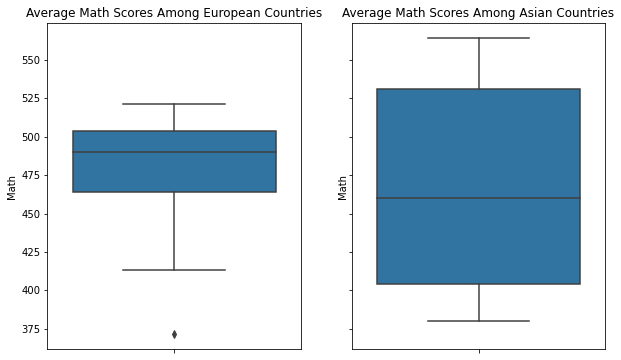

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6), sharey=True)
sns.boxplot(y=df[df.Continent_Code=='EU'].Math, ax=ax[0])
ax[0].set_title('Average Math Scores Among European Countries')
sns.boxplot(y=df[df.Continent_Code=='AS'].Math, ax=ax[1])
ax[1].set_title('Average Math Scores Among Asian Countries');

### Exercise - 4
<p>The sample dataset has placement test scores (out of 100 points) for four subject areas: English, Reading, Math, and Writing. Students in the sample completed all 4 placement tests when they enrolled in the university. Suppose we are particularly interested in the English and Math sections, and want to determine whether students tended to score higher on their English or Math test, on average. We could use a paired t test to test if there was a significant difference in the average of the two tests.</p>

In [22]:
students = pd.read_csv('students_2014.csv')

In [23]:
students.head()

,ids,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,Weight,...,English,Reading,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime
0,43783,3/22/1995,NaN,NaN,NaN,NaN,0.0,0,72.35,NaN,...,88.24,81.50,60.02,81.44,In state,1.0,NaN,NaN,7.0,1.0
1,20278,1/1/1995,NaN,NaN,NaN,Philosophy,0.0,0,70.66,179.20,...,89.45,85.25,70.19,73.27,NaN,1.0,NaN,NaN,5.0,2.0
2,20389,12/31/1994,NaN,NaN,NaN,NaN,0.0,0,70.68,198.52,...,96.73,86.88,71.20,84.24,In state,NaN,NaN,NaN,8.0,7.0
3,22820,12/1/1994,NaN,NaN,NaN,business administration,1.0,0,NaN,198.34,...,74.06,88.68,55.89,73.16,In state,1.0,NaN,NaN,2.0,6.0
4,24559,11/10/1994,NaN,NaN,NaN,NaN,1.0,1,67.43,128.17,...,82.61,77.30,65.52,80.45,Out of state,1.0,NaN,NaN,7.0,3.0


In [24]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ids           435 non-null    int64  
 1   bday          427 non-null    object 
 2   enrolldate    406 non-null    object 
 3   expgradate    406 non-null    object 
 4   Rank          406 non-null    float64
 5   Major         276 non-null    object 
 6   Gender        426 non-null    float64
 7   Athlete       435 non-null    int64  
 8   Height        408 non-null    float64
 9   Weight        376 non-null    float64
 10  Smoking       411 non-null    float64
 11  Sprint        374 non-null    float64
 12  MileMinDur    392 non-null    object 
 13  English       409 non-null    float64
 14  Reading       425 non-null    float64
 15  Math          422 non-null    float64
 16  Writing       404 non-null    float64
 17  State         408 non-null    object 
 18  LiveOnCampus  414 non-null    

In [28]:
students.describe()

,ids,Rank,Gender,Athlete,Height,Weight,Smoking,Sprint,English,Reading,Math,Writing,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime
count,435.000000,406.000000,426.000000,435.000000,408.000000,376.000000,411.000000,374.000000,409.000000,425.000000,422.000000,404.000000,414.000000,247.000000,247.000000,403.000000,393.000000
mean,35279.022989,2.199507,0.521127,0.422989,68.031765,181.031569,0.430657,6.581933,82.787555,82.070800,65.468009,79.521683,0.410628,2.781377,27.000000,5.461538,7.208651
std,8637.733605,1.098641,0.500141,0.494602,5.325655,42.749680,0.766324,1.227069,6.839803,7.661778,8.375930,5.511410,0.492543,0.698996,10.072905,2.421994,4.356233
min,20183.000000,1.000000,0.000000,0.000000,55.000000,101.710000,0.000000,4.503000,59.830000,55.110000,35.320000,64.060000,0.000000,1.000000,4.000000,0.000000,0.000000
25%,28001.000000,1.000000,0.000000,0.000000,64.827500,153.860000,0.000000,5.587500,78.330000,77.190000,60.202500,75.750000,0.000000,3.000000,21.000000,4.000000,4.000000
50%,35350.000000,2.000000,1.000000,0.000000,67.570000,172.960000,0.000000,6.569000,83.150000,81.940000,65.445000,79.035000,0.000000,3.000000,27.000000,5.000000,6.000000
75%,42655.500000,3.000000,1.000000,1.000000,71.575000,204.307500,1.000000,7.458000,87.170000,87.080000,70.567500,83.687500,1.000000,3.000000,32.000000,7.000000,10.000000
max,49947.000000,4.000000,1.000000,1.000000,84.410000,350.070000,2.000000,9.597000,101.950000,103.620000,93.780000,93.010000,1.000000,4.000000,64.000000,13.000000,23.000000


In [29]:
students.isnull().sum()

ids               0
bday              8
enrolldate       29
expgradate       29
Rank             29
Major           159
Gender            9
Athlete           0
Height           27
Weight           59
Smoking          24
Sprint           61
MileMinDur       43
English          26
Reading          10
Math             13
Writing          31
State            27
LiveOnCampus     21
HowCommute      188
CommuteTime     188
SleepTime        32
StudyTime        42
dtype: int64

In [30]:
stu = students[['English', 'Math']]
stu.head()

,English,Math
0,88.24,60.02
1,89.45,70.19
2,96.73,71.20
3,74.06,55.89
4,82.61,65.52


In [31]:
stu.isnull().sum()

English    26
Math       13
dtype: int64

In [32]:
stu.dropna(inplace=True)
stu

,English,Math
0,88.24,60.02
1,89.45,70.19
2,96.73,71.20
3,74.06,55.89
4,82.61,65.52
...,...,...
430,87.72,65.31
431,91.01,70.25
432,81.05,58.16
433,75.59,66.84


In [33]:
# Ho : mu1 = mu2
# Ha : mu != mu2

In [34]:
mu1 = stu.English
mu2 = stu.Math

In [35]:
stats.ttest_rel(mu1, mu2)

Ttest_relResult(statistic=36.312568981719856, pvalue=3.0710987192210606e-128)

<p>Since we have a very high t statistic and a very low p_value, we can reject the null hypothesis. Thus, we can conclude that on average students tended to score higher on their English tests than their Math tests.</p>